In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

<Figure size 1500x800 with 0 Axes>

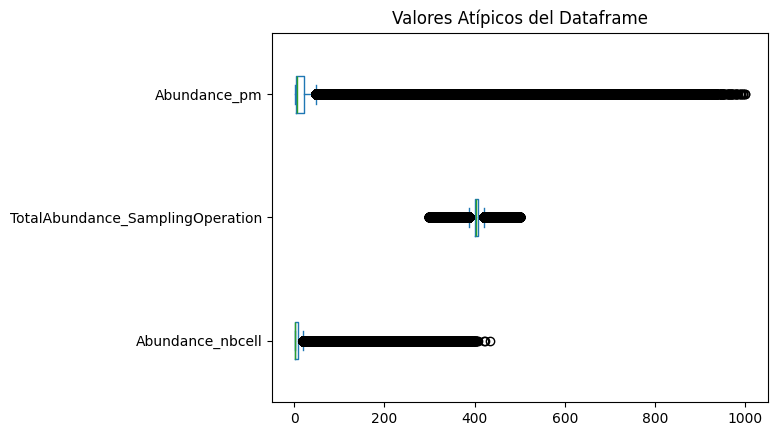

In [3]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [4]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Abundance_nbcell                     94.948382
TotalAbundance_SamplingOperation    437.096025
Abundance_pm                        233.878730
dtype: float64
Limite inferior permitido Abundance_nbcell                    -71.124054
TotalAbundance_SamplingOperation    374.808697
Abundance_pm                       -175.176372
dtype: float64


In [5]:
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [6]:
valores_nulos=data3.isnull().sum()
valores_nulos

Abundance_nbcell                    37619
TotalAbundance_SamplingOperation    34628
Abundance_pm                        37352
dtype: int64

In [7]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.median(),1))
data_clean

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [8]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [9]:
Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8.0,420.0,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1.0,404.0,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1.0,400.0,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2.0,400.0,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1.0,400.0,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1.0,412.0,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1.0,400.0,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1.0,403.0,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7.0,400.0,17.500000


In [10]:
Tabla_freq = Datos_limpios['TaxonName'].value_counts().reset_index()

In [11]:
pd.options.display.max_rows = None
Tabla_freq.head(15)

,TaxonName,count
0,Achnanthes minutissima,43691
1,Amphora pediculus,39209
2,Cocconeis euglypta,38570
3,Sellaphora nigri,38039
4,Navicula cryptotenella,37723
5,Nitzschia dissipata,34461
6,Vibrio tripunctatus,30899
7,Rhoicosphenia abbreviata,30560
8,Navicula permitis,29789
9,Achnanthes lanceolata,27239


In [12]:
Tabla_freq1 = Datos_limpios['TaxonCode'].value_counts().reset_index()

In [13]:
pd.options.display.max_rows = None
Tabla_freq1.head(15)

,TaxonCode,count
0,Achmi02,43691
1,Amppe02,39209
2,Coceu01,38570
3,Selni01,38039
4,Navcr09,37723
5,Nitdi04,34461
6,Vibtr01,30899
7,Rhoab01,30560
8,Navpe05,29789
9,Achla02,27239


In [14]:
Tabla_freq2 = Datos_limpios['SamplingOperations_code'].value_counts().reset_index()

In [15]:
pd.options.display.max_rows = None
Tabla_freq2.head(15)

,SamplingOperations_code,count
0,S05119000_20160627,97
1,S05051000_20080722,97
2,S05068700_20070904,94
3,S04215520_20200702,92
4,S04304002_20200907,92
5,S04103550_20150811,92
6,S04615008_20130719,91
7,S03132260_20120718,91
8,S04103935_20200929,89
9,S04473008_20160711,89


In [16]:
Tabla_freq3 = Datos_limpios['CodeSite_SamplingOperations'].value_counts().reset_index()

In [17]:
pd.options.display.max_rows = None
Tabla_freq3.head(15)

,CodeSite_SamplingOperations,count
0,S05119000,864
1,S05021650,845
2,S05093300,834
3,S05021500,831
4,S05018800,809
5,S02043600,806
6,S06131900,777
7,S06193700,775
8,S05124000,775
9,S05098850,773


In [18]:
Tabla_freq4 = Datos_limpios['Date_SamplingOperation'].value_counts().reset_index()

In [19]:
pd.options.display.max_rows = None
Tabla_freq4.head(15)

,Date_SamplingOperation,count
0,2013-07-11,4545
1,2013-07-17,4431
2,2013-07-16,4401
3,2015-07-08,4376
4,2018-07-17,4278
5,2015-06-24,4126
6,2012-07-25,4091
7,2012-07-24,3833
8,2016-07-21,3742
9,2016-07-20,3706


In [20]:
Tabla_final = pd.concat([Tabla_freq, Tabla_freq1, Tabla_freq2, Tabla_freq3, Tabla_freq4], axis=1)
Tabla_final.head(15)

,TaxonName,count,TaxonCode,count,SamplingOperations_code,count,CodeSite_SamplingOperations,count,Date_SamplingOperation,count
0,Achnanthes minutissima,43691.0,Achmi02,43691.0,S05119000_20160627,97,S05119000,864.0,2013-07-11,4545.0
1,Amphora pediculus,39209.0,Amppe02,39209.0,S05051000_20080722,97,S05021650,845.0,2013-07-17,4431.0
2,Cocconeis euglypta,38570.0,Coceu01,38570.0,S05068700_20070904,94,S05093300,834.0,2013-07-16,4401.0
3,Sellaphora nigri,38039.0,Selni01,38039.0,S04215520_20200702,92,S05021500,831.0,2015-07-08,4376.0
4,Navicula cryptotenella,37723.0,Navcr09,37723.0,S04304002_20200907,92,S05018800,809.0,2018-07-17,4278.0
5,Nitzschia dissipata,34461.0,Nitdi04,34461.0,S04103550_20150811,92,S02043600,806.0,2015-06-24,4126.0
6,Vibrio tripunctatus,30899.0,Vibtr01,30899.0,S04615008_20130719,91,S06131900,777.0,2012-07-25,4091.0
7,Rhoicosphenia abbreviata,30560.0,Rhoab01,30560.0,S03132260_20120718,91,S06193700,775.0,2012-07-24,3833.0
8,Navicula permitis,29789.0,Navpe05,29789.0,S04103935_20200929,89,S05124000,775.0,2016-07-21,3742.0
9,Achnanthes lanceolata,27239.0,Achla02,27239.0,S04473008_20160711,89,S05098850,773.0,2016-07-20,3706.0


In [21]:
# Mapeo para TaxonName
taxon_name_mapping = {name: i+1 for i, name in enumerate(Datos_limpios['TaxonName'].unique())}

# Mapeo para TaxonCode  
taxon_code_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['TaxonCode'].unique())}

# Mapeo para SamplingOperations_code
sampling_ops_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['SamplingOperations_code'].unique())}

# Mapeo para CodeSite_SamplingOperations
codesite_mapping = {code: i+1 for i, code in enumerate(Datos_limpios['CodeSite_SamplingOperations'].unique())}

# Mapeo para Date_SamplingOperation
date_mapping = {date: i+1 for i, date in enumerate(Datos_limpios['Date_SamplingOperation'].unique())}


In [22]:
# Crear un DataFrame completo con todas las variables numéricas
datos_numericos = Datos_limpios.copy()

# Aplicar los mapeos a las variables categóricas
datos_numericos['TaxonName_num'] = datos_numericos['TaxonName'].map(taxon_name_mapping)
datos_numericos['TaxonCode_num'] = datos_numericos['TaxonCode'].map(taxon_code_mapping)
datos_numericos['SamplingOperations_code_num'] = datos_numericos['SamplingOperations_code'].map(sampling_ops_mapping)
datos_numericos['CodeSite_SamplingOperations_num'] = datos_numericos['CodeSite_SamplingOperations'].map(codesite_mapping)
datos_numericos['Date_SamplingOperation_num'] = datos_numericos['Date_SamplingOperation'].map(date_mapping)

# Seleccionar solo las columnas numéricas para el análisis de correlación
columnas_numericas = ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm',
                     'TaxonName_num', 'TaxonCode_num', 'SamplingOperations_code_num', 
                     'CodeSite_SamplingOperations_num', 'Date_SamplingOperation_num']

datos_para_correlacion = datos_numericos[columnas_numericas]

datos_para_correlacion.head()

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,8.0,420.0,19.047619,1,1,1,1,1
1,1.0,404.0,2.475248,1,1,2,2,2
2,1.0,400.0,2.500000,2,2,3,3,3
3,2.0,400.0,5.000000,2,2,4,4,4
4,1.0,400.0,2.500000,2,2,5,5,5


In [23]:
# Seleccionar solo las 5 variables categóricas convertidas a numéricas
variables_categoricas_num = ['TaxonName_num', 'TaxonCode_num', 'SamplingOperations_code_num', 
                            'CodeSite_SamplingOperations_num', 'Date_SamplingOperation_num']

datos_categoricas_num = datos_numericos[variables_categoricas_num]

datos_categoricas_num.head(10)

,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,1,1,1,1,1
1,1,1,2,2,2
2,2,2,3,3,3
3,2,2,4,4,4
4,2,2,5,5,5
5,2,2,6,6,6
6,2,2,7,7,7
7,2,2,8,8,8
8,2,2,9,9,9
9,2,2,10,10,10


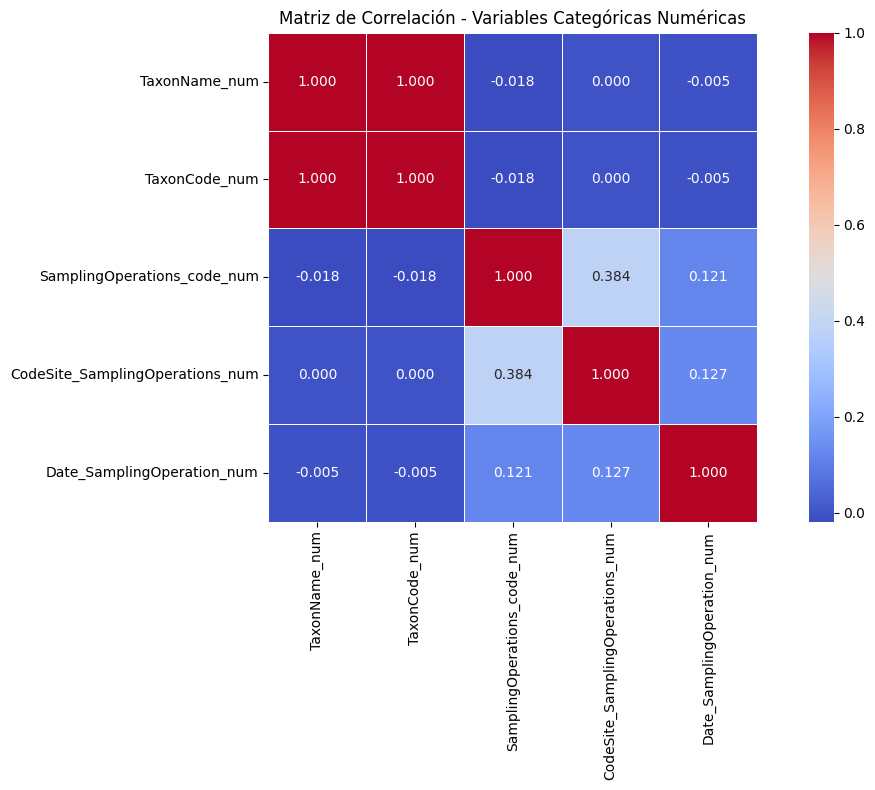

Matriz de correlación:
                                 TaxonName_num  TaxonCode_num  \
TaxonName_num                            1.000          1.000   
TaxonCode_num                            1.000          1.000   
SamplingOperations_code_num             -0.018         -0.018   
CodeSite_SamplingOperations_num          0.000          0.000   
Date_SamplingOperation_num              -0.005         -0.005   

                                 SamplingOperations_code_num  \
TaxonName_num                                         -0.018   
TaxonCode_num                                         -0.018   
SamplingOperations_code_num                            1.000   
CodeSite_SamplingOperations_num                        0.384   
Date_SamplingOperation_num                             0.121   

                                 CodeSite_SamplingOperations_num  \
TaxonName_num                                              0.000   
TaxonCode_num                                              0.000 

In [24]:
# Regresión Lineal Simple
# Crea una tabla de los 5 pares de variables con mayor correlación (apoyándote de la herramienta Heatmap).
# Calculamos la correlación de las variables categóricas convertidas a numéricas
correlation_matrix = datos_categoricas_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", 
            square=True, linewidths=0.5)
plt.title("Matriz de Correlación - Variables Categóricas Numéricas")
plt.tight_layout()
plt.show()

print("Matriz de correlación:")
print(correlation_matrix.round(3))          

Crea una tabla de los 5 pares de variables con mayor correlación (apoyándote de la herramienta Heatmap).


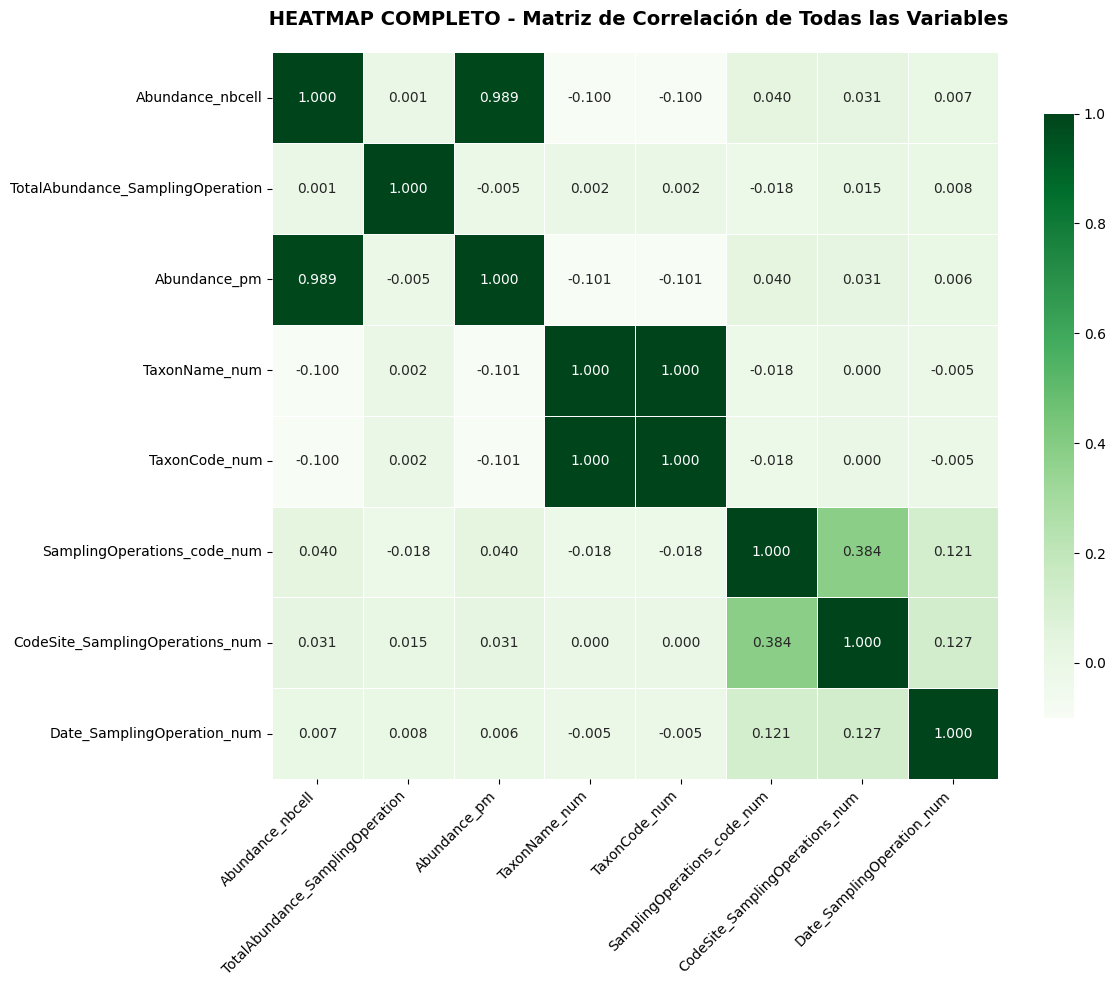

 ANÁLISIS DE CORRELACIONES USANDO HEATMAP

 TOP 5 PARES DE VARIABLES CON MAYOR CORRELACIÓN:
 Ranking                      Variable 1                      Variable 2  Correlación Original  Correlación Interpretación
       1                   TaxonName_num                   TaxonCode_num                1.0000       1.0000     Muy Fuerte
       2                Abundance_nbcell                    Abundance_pm                0.9890       0.9890     Muy Fuerte
       3     SamplingOperations_code_num CodeSite_SamplingOperations_num                0.3836       0.3836          Débil
       4 CodeSite_SamplingOperations_num      Date_SamplingOperation_num                0.1269       0.1269      Muy Débil
       5     SamplingOperations_code_num      Date_SamplingOperation_num                0.1207       0.1207      Muy Débil
 ANÁLISIS DETALLADO:

1.  TaxonName_num ↔ TaxonCode_num
    Correlación: 1.0000 (|1.0000|)
    Interpretación: Muy Fuerte
     Relación POSITIVA: Cuando TaxonName_num aum

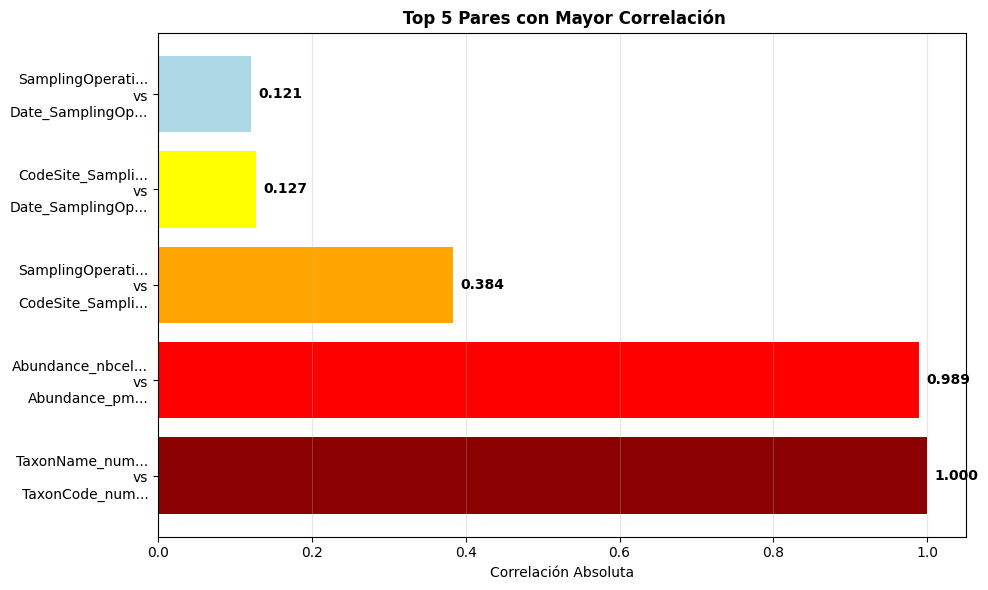

In [25]:
# Crea una tabla de los 5 pares de variables con mayor correlación (apoyándote de la herramienta Heatmap).

# Primero, crear un heatmap completo para visualizar todas las correlaciones
plt.figure(figsize=(12, 10))

# Calcular la matriz de correlación completa
correlation_matrix_completa = datos_para_correlacion.corr()

# Crear heatmap con todas las correlaciones
sns.heatmap(correlation_matrix_completa, 
            annot=True, 
            cmap='Greens', 
            fmt='.3f',
            square=True, 
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title(' HEATMAP COMPLETO - Matriz de Correlación de Todas las Variables', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(" ANÁLISIS DE CORRELACIONES USANDO HEATMAP")

# Crear tabla de los 5 pares con mayor correlación
# Obtener los valores de correlación sin incluir la diagonal (correlación = 1)
correlation_values = []
variables = correlation_matrix_completa.columns

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        corr_value = correlation_matrix_completa.iloc[i, j]
        correlation_values.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'Correlación': abs(corr_value),
            'Correlación Original': corr_value,
            'Interpretación': 'Muy Fuerte' if abs(corr_value) >= 0.8 else 
                           'Fuerte' if abs(corr_value) >= 0.6 else
                           'Moderada' if abs(corr_value) >= 0.4 else
                           'Débil' if abs(corr_value) >= 0.2 else 'Muy Débil'
        })

# Convertir a DataFrame y ordenar por correlación absoluta
df_correlaciones = pd.DataFrame(correlation_values)
df_correlaciones = df_correlaciones.sort_values('Correlación', ascending=False)

# Mostrar la tabla de los 5 pares con mayor correlación
print("\n TOP 5 PARES DE VARIABLES CON MAYOR CORRELACIÓN:")
top_5_correlaciones = df_correlaciones.head(5).copy()

# Formatear la tabla para mejor presentación
top_5_correlaciones['Ranking'] = range(1, 6)
top_5_correlaciones = top_5_correlaciones[['Ranking', 'Variable 1', 'Variable 2', 
                                         'Correlación Original', 'Correlación', 'Interpretación']]

# Mostrar la tabla
print(top_5_correlaciones.to_string(index=False, float_format='%.4f'))

print(" ANÁLISIS DETALLADO:")

for i, row in top_5_correlaciones.iterrows():
    rank = row['Ranking']
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    corr_orig = row['Correlación Original']
    corr_abs = row['Correlación']
    interp = row['Interpretación']
    
    print(f"\n{rank}.  {var1} ↔ {var2}")
    print(f"    Correlación: {corr_orig:.4f} (|{corr_abs:.4f}|)")
    print(f"    Interpretación: {interp}")
    
    if corr_orig > 0:
        print(f"     Relación POSITIVA: Cuando {var1} aumenta, {var2} tiende a aumentar")
    else:
        print(f"Relación NEGATIVA: Cuando {var1} aumenta, {var2} tiende a disminuir")

print(" CONCLUSIONES DEL HEATMAP:")
print(f" La correlación más fuerte es: {top_5_correlaciones.iloc[0]['Correlación Original']:.4f}")
print(f"   Entre: '{top_5_correlaciones.iloc[0]['Variable 1']}' y '{top_5_correlaciones.iloc[0]['Variable 2']}'")
print(f"\n Distribución de fuerza de correlaciones en el Top 5:")
interpretaciones_count = top_5_correlaciones['Interpretación'].value_counts()
for interp, count in interpretaciones_count.items():
    print(f"   {interp}: {count} par(es)")

# Crear visualización específica del top 5
plt.figure(figsize=(10, 6))
plt.barh(range(5), top_5_correlaciones['Correlación'], 
         color=['darkred', 'red', 'orange', 'yellow', 'lightblue'])
plt.yticks(range(5), [f"{row['Variable 1'][:15]}...\nvs\n{row['Variable 2'][:15]}..." 
                      for _, row in top_5_correlaciones.iterrows()])
plt.xlabel('Correlación Absoluta')
plt.title(' Top 5 Pares con Mayor Correlación', fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (_, row) in enumerate(top_5_correlaciones.iterrows()):
    plt.text(row['Correlación'] + 0.01, i, f"{row['Correlación']:.3f}", 
             va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.show()

Crear el mejor modelo de regression lineal multiple para cada variable cuantitativa: (TaxonName, TaxonCode, SamplingOperations_code, CodeSite_SamplingOperations, Date_SamplingOperation, Abundance_nbcell, TotalAbundance_SamplingOperation, Abundance_pm), y comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor (lineales simples).

***TaxonName***

In [26]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos_para_correlacion[['Abundance_nbcell','Abundance_pm', 'SamplingOperations_code_num']]
Var_Dep= datos_para_correlacion['TaxonName_num']

In [27]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [28]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_nbcell', 'Abundance_pm', 'SamplingOperations_code_num'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-1.74742901e+00, -1.33613958e+00, -7.05436347e-04]),
 'rank_': 3,
 'singular_': array([1.76072619e+07, 4.73304634e+04, 2.43964556e+03]),
 'intercept_': np.float64(1155.4497826990857)}

In [30]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010341433088135621

In [31]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos_para_correlacion[['Abundance_nbcell','Abundance_pm', 'SamplingOperations_code_num']])
y_pred

array([1116.01936753, 1150.39366664, 1150.35988844, ..., 1145.34864448,
       1091.20167571, 1148.03053762], shape=(1643872,))

In [32]:
#Insertamos la columna de predicciones en el DataFrame
datos_para_correlacion.insert(0, 'Predicciones', y_pred)
datos_para_correlacion.head()

,Predicciones,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,1116.019368,8.0,420.0,19.047619,1,1,1,1,1
1,1150.393667,1.0,404.0,2.475248,1,1,2,2,2
2,1150.359888,1.0,400.0,2.500000,2,2,3,3,3
3,1145.271405,2.0,400.0,5.000000,2,2,4,4,4
4,1150.358478,1.0,400.0,2.500000,2,2,5,5,5


<Axes: xlabel='Abundance_pm', ylabel='TaxonName_num'>

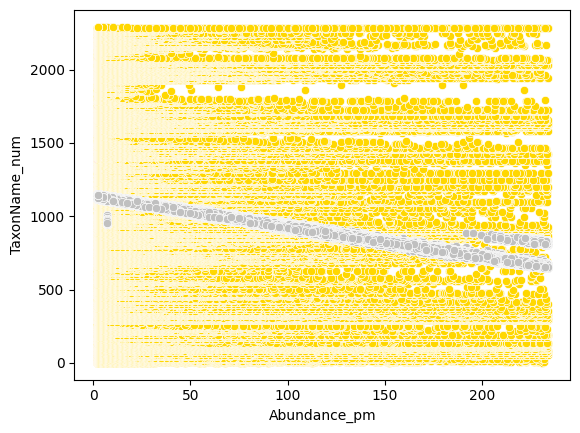

In [33]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Abundance_pm', y='TaxonName_num', color="gold", data=datos_para_correlacion)
sns.scatterplot(x='Abundance_pm', y='Predicciones', color="silver", data=datos_para_correlacion)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [34]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.010341433088135621

In [35]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.1016928369558821)

***TaxonCode***

In [36]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos_para_correlacion[['Abundance_nbcell','Abundance_pm', 'SamplingOperations_code_num']]
Var_Dep= datos_para_correlacion['TaxonCode_num']

In [37]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [38]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_nbcell', 'Abundance_pm', 'SamplingOperations_code_num'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-1.74742901e+00, -1.33613958e+00, -7.05436347e-04]),
 'rank_': 3,
 'singular_': array([1.76072619e+07, 4.73304634e+04, 2.43964556e+03]),
 'intercept_': np.float64(1155.4497826990857)}

In [40]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010341433088135621

In [41]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos_para_correlacion[['Abundance_nbcell','Abundance_pm', 'SamplingOperations_code_num']])
y_pred

array([1116.01936753, 1150.39366664, 1150.35988844, ..., 1145.34864448,
       1091.20167571, 1148.03053762], shape=(1643872,))

In [42]:
#Insertamos la columna de predicciones en el DataFrame
datos_para_correlacion.insert(0, 'Predicciones1', y_pred)
datos_para_correlacion.head()

,Predicciones1,Predicciones,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,1116.019368,1116.019368,8.0,420.0,19.047619,1,1,1,1,1
1,1150.393667,1150.393667,1.0,404.0,2.475248,1,1,2,2,2
2,1150.359888,1150.359888,1.0,400.0,2.500000,2,2,3,3,3
3,1145.271405,1145.271405,2.0,400.0,5.000000,2,2,4,4,4
4,1150.358478,1150.358478,1.0,400.0,2.500000,2,2,5,5,5


<Axes: xlabel='Abundance_pm', ylabel='TaxonCode_num'>

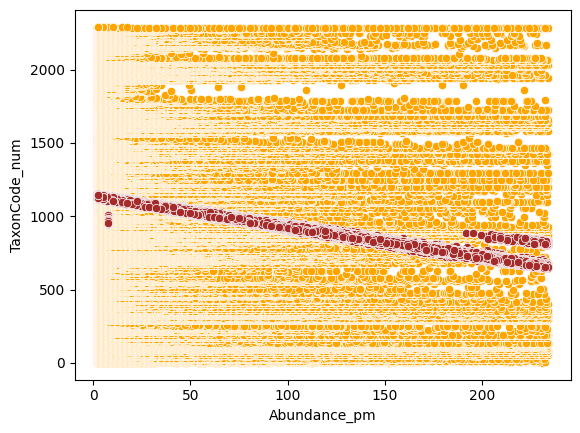

In [43]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='Abundance_pm', y='TaxonCode_num', color="orange", data=datos_para_correlacion)
sns.scatterplot(x='Abundance_pm', y='Predicciones1', color="brown", data=datos_para_correlacion)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)ñ

In [44]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.010341433088135621

In [45]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.1016928369558821)

***SamplingOperations_code***

In [46]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos_para_correlacion[['CodeSite_SamplingOperations_num', 'Date_SamplingOperation_num']]
Var_Dep= datos_para_correlacion['SamplingOperations_code_num']

In [47]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [48]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CodeSite_SamplingOperations_num', 'Date_SamplingOperation_num'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([2.43388055, 2.26609833]),
 'rank_': 2,
 'singular_': array([2708806.13381527,  563534.17736894]),
 'intercept_': np.float64(13369.034296255693)}

In [50]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.15240331903083681

In [51]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos_para_correlacion[['CodeSite_SamplingOperations_num', 'Date_SamplingOperation_num']])
y_pred

array([13373.73427513, 13378.43425401, 13383.13423289, ...,
       21660.26278127, 23212.54013854, 18213.80922731], shape=(1643872,))

In [52]:
#Insertamos la columna de predicciones en el DataFrame
datos_para_correlacion.insert(0, 'Predicciones2', y_pred)
datos_para_correlacion.head()

,Predicciones2,Predicciones1,Predicciones,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,13373.734275,1116.019368,1116.019368,8.0,420.0,19.047619,1,1,1,1,1
1,13378.434254,1150.393667,1150.393667,1.0,404.0,2.475248,1,1,2,2,2
2,13383.134233,1150.359888,1150.359888,1.0,400.0,2.500000,2,2,3,3,3
3,13387.834212,1145.271405,1145.271405,2.0,400.0,5.000000,2,2,4,4,4
4,13392.534191,1150.358478,1150.358478,1.0,400.0,2.500000,2,2,5,5,5


<Axes: xlabel='CodeSite_SamplingOperations_num', ylabel='SamplingOperations_code_num'>

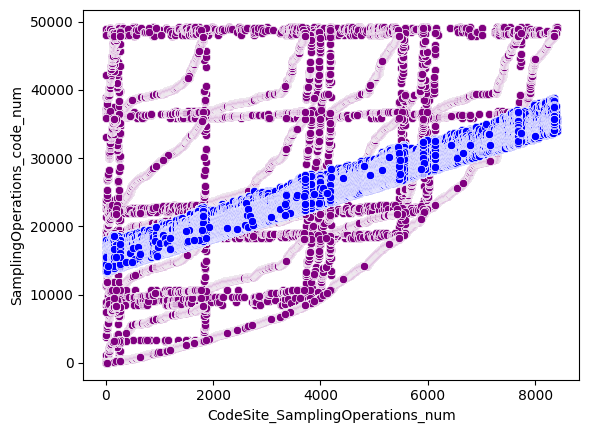

In [53]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='CodeSite_SamplingOperations_num', y='SamplingOperations_code_num', color="purple", data=datos_para_correlacion)
sns.scatterplot(x='CodeSite_SamplingOperations_num', y='Predicciones2', color="blue", data=datos_para_correlacion)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)ñ

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15240331903083681

In [55]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.3903886768732372)

***CodeSite_SamplingOperations***

In [56]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos_para_correlacion[['SamplingOperations_code_num', 'Date_SamplingOperation_num']]
Var_Dep= datos_para_correlacion['CodeSite_SamplingOperations_num']

In [57]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code_num', 'Date_SamplingOperation_num'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.05747325, 0.38984047]),
 'rank_': 2,
 'singular_': array([17607395.48985247,   564182.77344881]),
 'intercept_': np.float64(1571.7051479037232)}

In [60]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.1537366744111638

In [61]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos_para_correlacion[['SamplingOperations_code_num', 'Date_SamplingOperation_num']])
y_pred

array([1572.15246162, 1572.59977534, 1573.04708907, ..., 2007.1288811 ,
       4196.53483047, 1815.06237986], shape=(1643872,))

In [62]:
#Insertamos la columna de predicciones en el DataFrame
datos_para_correlacion.insert(0, 'Predicciones3', y_pred)
datos_para_correlacion.head()

,Predicciones3,Predicciones2,Predicciones1,Predicciones,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,1572.152462,13373.734275,1116.019368,1116.019368,8.0,420.0,19.047619,1,1,1,1,1
1,1572.599775,13378.434254,1150.393667,1150.393667,1.0,404.0,2.475248,1,1,2,2,2
2,1573.047089,13383.134233,1150.359888,1150.359888,1.0,400.0,2.500000,2,2,3,3,3
3,1573.494403,13387.834212,1145.271405,1145.271405,2.0,400.0,5.000000,2,2,4,4,4
4,1573.941717,13392.534191,1150.358478,1150.358478,1.0,400.0,2.500000,2,2,5,5,5


<Axes: xlabel='SamplingOperations_code_num', ylabel='CodeSite_SamplingOperations_num'>

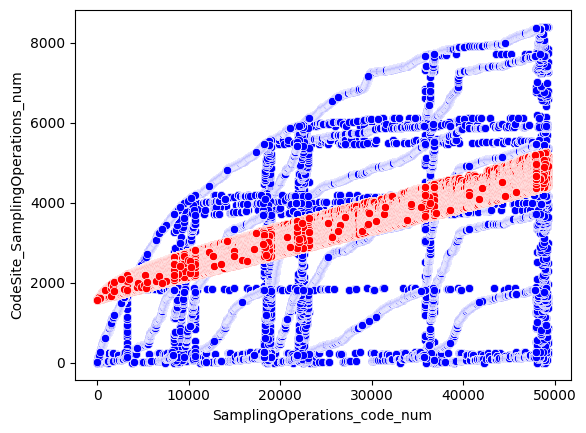

In [63]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='SamplingOperations_code_num', y='CodeSite_SamplingOperations_num', color="blue", data=datos_para_correlacion)
sns.scatterplot(x='SamplingOperations_code_num', y='Predicciones3', color="red", data=datos_para_correlacion)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)ñ

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.1537366744111638

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.39209268599549746)

***Date_SamplingOperation***

In [106]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos_para_correlacion[['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num']]
Var_Dep= datos_para_correlacion['Date_SamplingOperation_num']



In [67]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [68]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.00272383, 0.01984363]),
 'rank_': 2,
 'singular_': array([17638499.10207212,  2496239.40628785]),
 'intercept_': np.float64(547.5435544037675)}

In [70]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.022179747075496525

In [71]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos_para_correlacion[['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num']])
y_pred

array([547.56612186, 547.58868931, 547.61125677, ..., 633.41374483,
       724.52028421, 593.51447939], shape=(1643872,))

In [72]:
#Insertamos la columna de predicciones en el DataFrame
datos_para_correlacion.insert(0, 'Predicciones4', y_pred)
datos_para_correlacion.head()

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,547.566122,1572.152462,13373.734275,1116.019368,1116.019368,8.0,420.0,19.047619,1,1,1,1,1
1,547.588689,1572.599775,13378.434254,1150.393667,1150.393667,1.0,404.0,2.475248,1,1,2,2,2
2,547.611257,1573.047089,13383.134233,1150.359888,1150.359888,1.0,400.0,2.500000,2,2,3,3,3
3,547.633824,1573.494403,13387.834212,1145.271405,1145.271405,2.0,400.0,5.000000,2,2,4,4,4
4,547.656392,1573.941717,13392.534191,1150.358478,1150.358478,1.0,400.0,2.500000,2,2,5,5,5


<Axes: xlabel='CodeSite_SamplingOperations_num', ylabel='Date_SamplingOperation_num'>

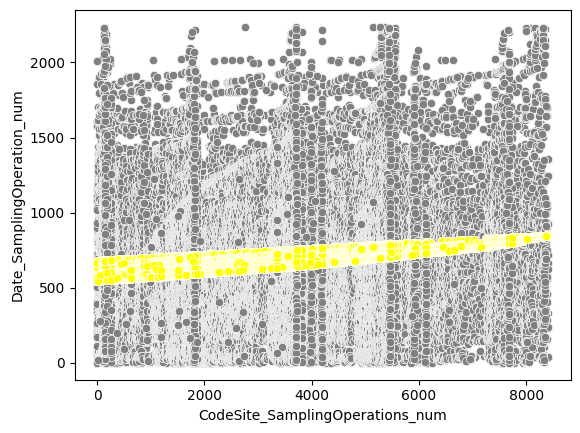

In [73]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='CodeSite_SamplingOperations_num', y='Date_SamplingOperation_num', color="grey", data=datos_para_correlacion)
sns.scatterplot(x='CodeSite_SamplingOperations_num', y='Predicciones4', color="yellow", data=datos_para_correlacion)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)ñ

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.022179747075496525

In [75]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.14892866438498845)

***Abundance_nbcell***

In [76]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos_para_correlacion[['TaxonCode_num', 'TaxonName_num']]
Var_Dep= datos_para_correlacion['Abundance_nbcell']

In [77]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [78]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TaxonCode_num', 'TaxonName_num'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.00099707, -0.00099707]),
 'rank_': 1,
 'singular_': array([1.26484141e+06, 4.42987456e-07]),
 'intercept_': np.float64(10.565626962782304)}

In [80]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.010053621040879368

In [81]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos_para_correlacion[['TaxonCode_num', 'TaxonName_num']])
y_pred

array([10.56363283, 10.56363283, 10.56163869, ...,  5.99506954,
        5.99506954,  5.99506954], shape=(1643872,))

In [82]:
#Insertamos la columna de predicciones en el DataFrame
datos_para_correlacion.insert(0, 'Predicciones5', y_pred)
datos_para_correlacion.head()

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,10.563633,547.566122,1572.152462,13373.734275,1116.019368,1116.019368,8.0,420.0,19.047619,1,1,1,1,1
1,10.563633,547.588689,1572.599775,13378.434254,1150.393667,1150.393667,1.0,404.0,2.475248,1,1,2,2,2
2,10.561639,547.611257,1573.047089,13383.134233,1150.359888,1150.359888,1.0,400.0,2.500000,2,2,3,3,3
3,10.561639,547.633824,1573.494403,13387.834212,1145.271405,1145.271405,2.0,400.0,5.000000,2,2,4,4,4
4,10.561639,547.656392,1573.941717,13392.534191,1150.358478,1150.358478,1.0,400.0,2.500000,2,2,5,5,5


<Axes: xlabel='TaxonName_num', ylabel='Abundance_nbcell'>

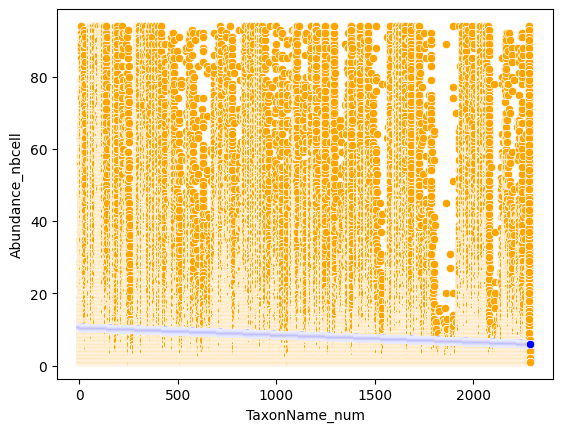

In [83]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='TaxonName_num', y='Abundance_nbcell', color="orange", data=datos_para_correlacion)
sns.scatterplot(x='TaxonName_num', y='Predicciones5', color="blue", data=datos_para_correlacion)


In [84]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.010053621040879368

In [85]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.10026774676275202)

***TotalAbundance_SamplingOperation***

In [86]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos_para_correlacion[['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num','Date_SamplingOperation_num']]
Var_Dep= datos_para_correlacion['TotalAbundance_SamplingOperation']

In [87]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [88]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num',
        'Date_SamplingOperation_num'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-1.40713907e-05,  7.86129747e-05,  1.25062061e-04]),
 'rank_': 3,
 'singular_': array([17638634.16316076,  2496746.68888054,   561882.09812186]),
 'intercept_': np.float64(405.17068600530183)}

In [90]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0009419290521628376

In [91]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos_para_correlacion[['SamplingOperations_code_num', 'CodeSite_SamplingOperations_num','Date_SamplingOperation_num']])
y_pred

array([405.17087561, 405.17106521, 405.17125482, ..., 405.34130973,
       404.95631737, 405.28776953], shape=(1643872,))

In [92]:
#Insertamos la columna de predicciones en el DataFrame
datos_para_correlacion.insert(0, 'Predicciones6', y_pred)
datos_para_correlacion.head()

,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,405.170876,10.563633,547.566122,1572.152462,13373.734275,1116.019368,1116.019368,8.0,420.0,19.047619,1,1,1,1,1
1,405.171065,10.563633,547.588689,1572.599775,13378.434254,1150.393667,1150.393667,1.0,404.0,2.475248,1,1,2,2,2
2,405.171255,10.561639,547.611257,1573.047089,13383.134233,1150.359888,1150.359888,1.0,400.0,2.500000,2,2,3,3,3
3,405.171444,10.561639,547.633824,1573.494403,13387.834212,1145.271405,1145.271405,2.0,400.0,5.000000,2,2,4,4,4
4,405.171634,10.561639,547.656392,1573.941717,13392.534191,1150.358478,1150.358478,1.0,400.0,2.500000,2,2,5,5,5


<Axes: xlabel='SamplingOperations_code_num', ylabel='TotalAbundance_SamplingOperation'>

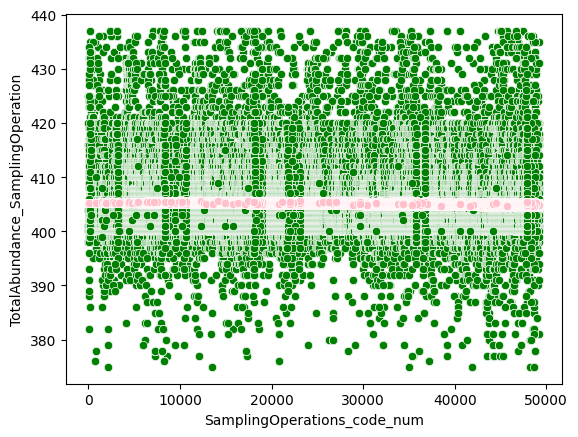

In [93]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='SamplingOperations_code_num', y='TotalAbundance_SamplingOperation', color="green", data=datos_para_correlacion)
sns.scatterplot(x='SamplingOperations_code_num', y='Predicciones6', color="pink", data=datos_para_correlacion)

In [94]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0009419290521628376

In [95]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.030690862681958576)

***Abundance_pm***

In [96]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos_para_correlacion[['TaxonName_num', 'TaxonCode_num','SamplingOperations_code_num']]
Var_Dep= datos_para_correlacion['Abundance_pm']

In [97]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [98]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['TaxonName_num', 'TaxonCode_num', 'SamplingOperations_code_num'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-2.45640680e-03, -2.45640680e-03,  9.46251827e-05]),
 'rank_': 2,
 'singular_': array([1.76072764e+07, 1.26463843e+06, 4.42731279e-07]),
 'intercept_': np.float64(23.943561293499574)}

In [100]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.011557593659038079

In [101]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos_para_correlacion[['TaxonName_num', 'TaxonCode_num','SamplingOperations_code_num']])
y_pred

array([23.93874311, 23.93883773, 23.93401954, ..., 13.35920556,
       16.52422867, 12.99612873], shape=(1643872,))

In [102]:
#Insertamos la columna de predicciones en el DataFrame
datos_para_correlacion.insert(0, 'Predicciones7', y_pred)
datos_para_correlacion.head()

,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,Predicciones,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_num,TaxonCode_num,SamplingOperations_code_num,CodeSite_SamplingOperations_num,Date_SamplingOperation_num
0,23.938743,405.170876,10.563633,547.566122,1572.152462,13373.734275,1116.019368,1116.019368,8.0,420.0,19.047619,1,1,1,1,1
1,23.938838,405.171065,10.563633,547.588689,1572.599775,13378.434254,1150.393667,1150.393667,1.0,404.0,2.475248,1,1,2,2,2
2,23.934020,405.171255,10.561639,547.611257,1573.047089,13383.134233,1150.359888,1150.359888,1.0,400.0,2.500000,2,2,3,3,3
3,23.934114,405.171444,10.561639,547.633824,1573.494403,13387.834212,1145.271405,1145.271405,2.0,400.0,5.000000,2,2,4,4,4
4,23.934209,405.171634,10.561639,547.656392,1573.941717,13392.534191,1150.358478,1150.358478,1.0,400.0,2.500000,2,2,5,5,5


<Axes: xlabel='TaxonName_num', ylabel='Abundance_pm'>

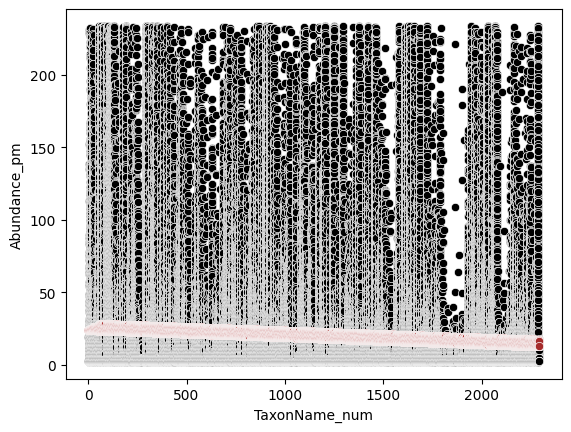

In [103]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='TaxonName_num', y='Abundance_pm', color="black", data=datos_para_correlacion)
sns.scatterplot(x='TaxonName_num', y='Predicciones7', color="brown", data=datos_para_correlacion)

In [104]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.011557593659038079

In [105]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.10750624939527041)